In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [8]:
def f(z):
    return z ** 2 - 1

In [9]:
x, y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
mesh = x + (1j * y)

In [10]:
def divergence_rate(mesh, num_iter=10, radius=2):
    z = mesh.copy()
    #값 별 반복 횟수를 저장
    diverge_len = np.zeros(mesh.shape)
    
    #발산되지 않은 값들에 대해 함수를 반복 적용
    for i in range(num_iter):
        # 1. Boolean 배열 마스크 생성
        conv_mask = (np.abs(z) < radius)

        # 2. 해당 값들에 대한 diverge_len 값 증가
        diverge_len[conv_mask] += 1

        # 3. 해당 값들에 대해 함수 적용
        z[conv_mask] = f(z[conv_mask])

    return diverge_len


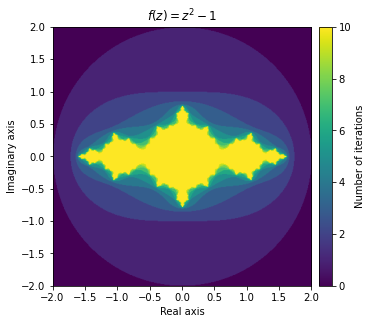

In [11]:
output = divergence_rate(mesh)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.set_title('$f(z) = z^2-1$')
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')

im = ax.imshow(output, extent=[-2, 2, -2, 2])
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
plt.colorbar(im, cax=cax, label='Number of iterations')

plt.show()
